## Exercise  2.1 Unsupervised Learning Algorithms


### 1. Importing Libraries and Data

### 2. Reduce  dataset to a 1980s only

### 3. Data Scaling

### 4. Dendrograms

### 5. Principal Component Analysis

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
path = '/Users/mariazaremba/Documents/CareerFoundry/Machine Learning with Python'

In [3]:
climate = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)

In [4]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [5]:
climate.shape

(22950, 170)

In [6]:
#Read in the pleasant weather data.
pleasantweather = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [7]:
pleasantweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
columns_to_drop = [col for col in climate.columns if any(city in col for city in ['GDANSK', 'ROMA', 'TOURS'])]

In [9]:
climate = climate.drop(columns=columns_to_drop)

In [10]:
climate.shape

(22950, 149)

## 2. Reduce dataset to a 1980s only

In [11]:
dfyear = climate[climate['DATE'].astype(str).str.startswith('1986')]
dfyear 

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
9497,19860101,1,7,2.1,0.70,1.0061,0.34,0.18,0,2.3,...,7,0.87,0.9804,0.20,1.36,0,1.1,5.2,0.7,9.6
9498,19860102,1,6,2.1,0.78,0.9977,0.55,0.06,1,3.7,...,4,0.89,0.9826,0.32,0.10,0,2.8,4.3,1.5,7.1
9499,19860103,1,5,2.1,0.61,1.0006,0.65,0.32,0,6.3,...,5,0.77,1.0106,0.34,1.79,0,1.6,5.9,1.6,7.5
9500,19860104,1,5,2.1,0.81,1.0166,0.63,0.00,5,6.5,...,6,0.82,1.0044,0.14,0.79,0,0.1,6.0,1.6,10.4
9501,19860105,1,8,2.1,0.69,1.0062,0.38,0.00,3,1.9,...,6,0.80,1.0033,0.21,0.28,0,1.4,3.4,0.7,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9857,19861227,12,8,2.1,0.79,1.0218,0.20,0.01,5,0.0,...,7,0.77,1.0269,0.12,0.12,0,0.0,8.4,5.7,10.7
9858,19861228,12,8,2.1,0.74,1.0257,0.12,0.00,3,0.0,...,8,0.92,1.0221,0.26,0.01,0,1.1,9.9,7.7,12.2
9859,19861229,12,8,2.1,0.69,1.0239,0.20,0.01,0,0.3,...,8,0.94,1.0118,0.12,2.53,0,0.0,11.2,10.0,12.1
9860,19861230,12,7,2.1,0.61,1.0191,0.36,0.00,0,0.7,...,6,0.85,0.9983,0.30,0.15,0,1.9,9.6,8.5,12.5


## 3. Data Scaling

In [12]:
#Scaling the data
scaler = StandardScaler()

In [13]:
# Fit and transform
scaled_features = scaler.fit_transform(dfyear)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_features)

In [14]:
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
0,-1.644406,-1.602745,0.640358,-4.440892e-16,-0.588192,-1.560353,-1.033488,-0.124370,-0.305050,-0.455403,...,0.598959,0.422892,-3.254596,-1.059097,1.245752,-0.084232,-0.602058,-1.192237,-1.521242,-0.737747
1,-1.641508,-1.602745,0.223726,-4.440892e-16,0.257045,-2.677416,-0.796560,-0.369860,-0.158738,-0.114684,...,-1.061447,0.678236,-3.041547,-0.914445,-0.439212,-0.084232,-0.107254,-1.431311,-1.325152,-1.375120
2,-1.638609,-1.602745,-0.192906,-4.440892e-16,-1.539084,-2.291763,-0.683737,0.162035,-0.305050,0.518079,...,-0.507978,-0.853829,-0.330026,-0.890336,1.820779,-0.084232,-0.456527,-1.006291,-1.300641,-1.273140
3,-1.635711,-1.602745,-0.192906,-4.440892e-16,0.574008,-0.164025,-0.706302,-0.492606,0.426509,0.566753,...,0.045491,-0.215469,-0.930434,-1.131423,0.483507,-0.084232,-0.893119,-0.979728,-1.300641,-0.533787
4,-1.632812,-1.602745,1.056989,-4.440892e-16,-0.693847,-1.547055,-0.988359,-0.492606,0.133885,-0.552751,...,0.045491,-0.470813,-1.036958,-1.047043,-0.198503,-0.084232,-0.514739,-1.670384,-1.521242,-1.630069


In [15]:
scaled_df.shape

(365, 149)

In [16]:
# Copying columns headers from original temp dataset, pasting to scaled

columns=climate.columns.values.tolist() #create a list of column names for your df
columns #list the columns

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 

In [17]:
scaled_df.columns = columns

In [18]:
scaled_df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.644406,-1.602745,0.640358,-4.440892e-16,-0.588192,-1.560353,-1.033488,-0.124370,-0.305050,-0.455403,...,0.598959,0.422892,-3.254596,-1.059097,1.245752,-0.084232,-0.602058,-1.192237,-1.521242,-0.737747
1,-1.641508,-1.602745,0.223726,-4.440892e-16,0.257045,-2.677416,-0.796560,-0.369860,-0.158738,-0.114684,...,-1.061447,0.678236,-3.041547,-0.914445,-0.439212,-0.084232,-0.107254,-1.431311,-1.325152,-1.375120
2,-1.638609,-1.602745,-0.192906,-4.440892e-16,-1.539084,-2.291763,-0.683737,0.162035,-0.305050,0.518079,...,-0.507978,-0.853829,-0.330026,-0.890336,1.820779,-0.084232,-0.456527,-1.006291,-1.300641,-1.273140
3,-1.635711,-1.602745,-0.192906,-4.440892e-16,0.574008,-0.164025,-0.706302,-0.492606,0.426509,0.566753,...,0.045491,-0.215469,-0.930434,-1.131423,0.483507,-0.084232,-0.893119,-0.979728,-1.300641,-0.533787
4,-1.632812,-1.602745,1.056989,-4.440892e-16,-0.693847,-1.547055,-0.988359,-0.492606,0.133885,-0.552751,...,0.045491,-0.470813,-1.036958,-1.047043,-0.198503,-0.084232,-0.514739,-1.670384,-1.521242,-1.630069


In [19]:
data = scaled_df.drop(columns=['DATE', 'MONTH'])

In [20]:
data.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.640358,-4.440892e-16,-0.588192,-1.560353,-1.033488,-0.124370,-0.305050,-0.455403,-1.550172,-1.556827,...,0.598959,0.422892,-3.254596,-1.059097,1.245752,-0.084232,-0.602058,-1.192237,-1.521242,-0.737747
1,0.223726,-4.440892e-16,0.257045,-2.677416,-0.796560,-0.369860,-0.158738,-0.114684,-0.715565,-0.960188,...,-1.061447,0.678236,-3.041547,-0.914445,-0.439212,-0.084232,-0.107254,-1.431311,-1.325152,-1.375120
2,-0.192906,-4.440892e-16,-1.539084,-2.291763,-0.683737,0.162035,-0.305050,0.518079,-0.348844,-0.221492,...,-0.507978,-0.853829,-0.330026,-0.890336,1.820779,-0.084232,-0.456527,-1.006291,-1.300641,-1.273140
3,-0.192906,-4.440892e-16,0.574008,-0.164025,-0.706302,-0.492606,0.426509,0.566753,-1.221388,-1.528416,...,0.045491,-0.215469,-0.930434,-1.131423,0.483507,-0.084232,-0.893119,-0.979728,-1.300641,-0.533787
4,1.056989,-4.440892e-16,-0.693847,-1.547055,-0.988359,-0.492606,0.133885,-0.552751,-1.132869,-1.585239,...,0.045491,-0.470813,-1.036958,-1.047043,-0.198503,-0.084232,-0.514739,-1.670384,-1.521242,-1.630069


## 4. Dendrograms

- single method

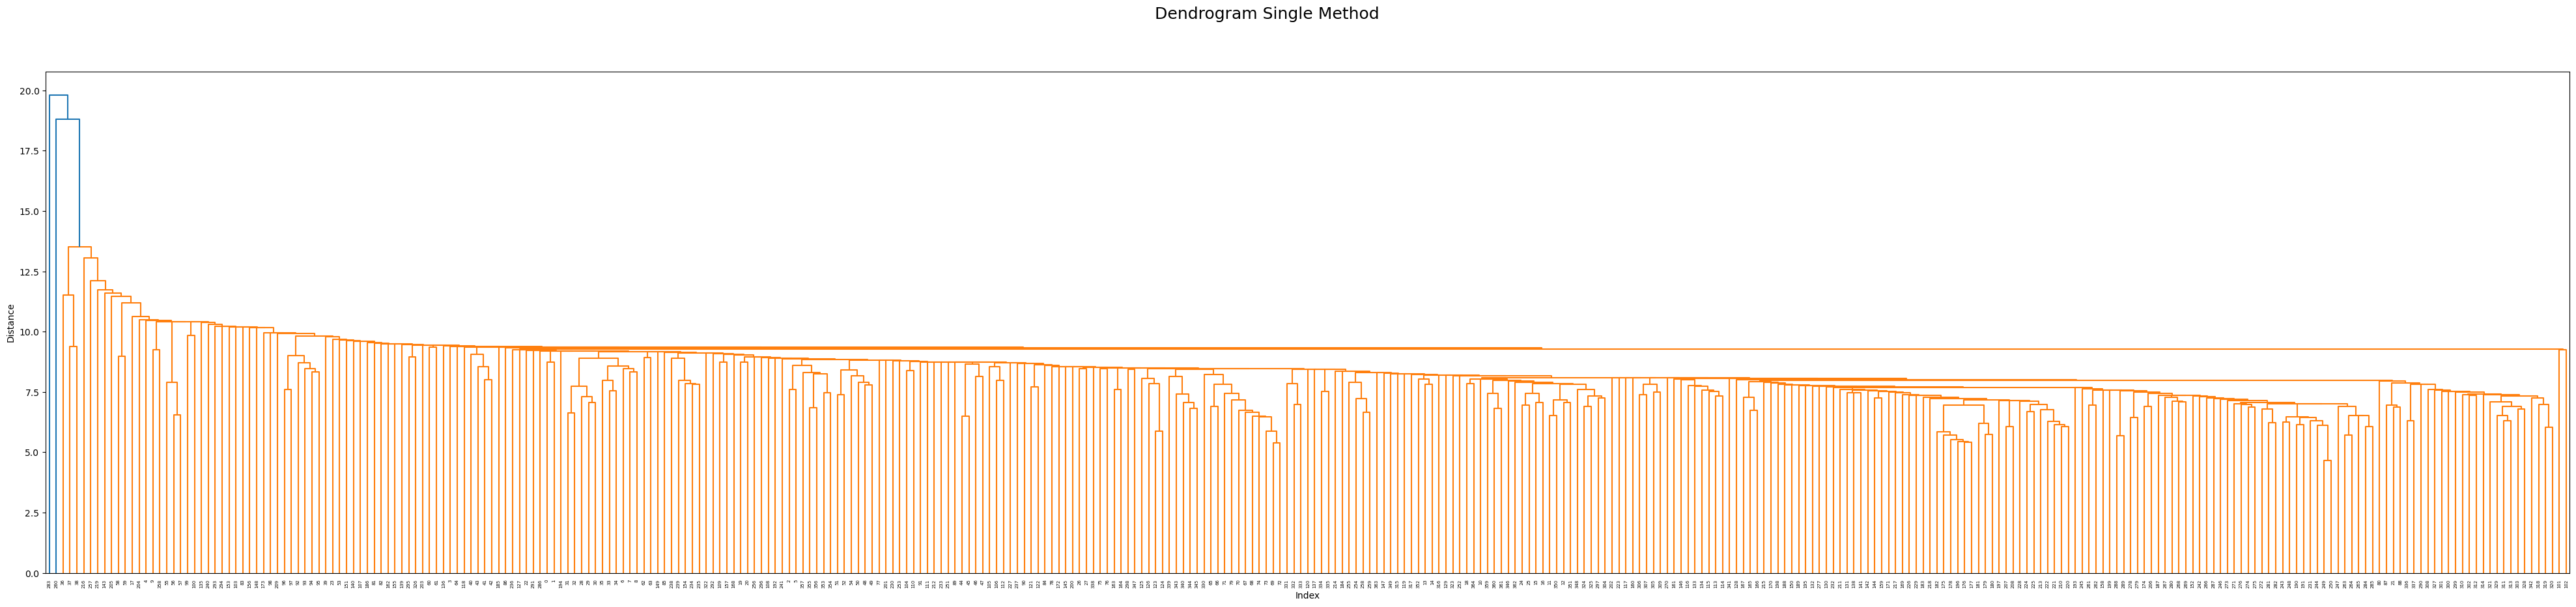

In [21]:
# Create the dendrogram using the single linkage method
linked = linkage(data, method='single')

# Plot the dendrogram
plt.figure(figsize=(50,10))
dendrogram(linked, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

- complete method

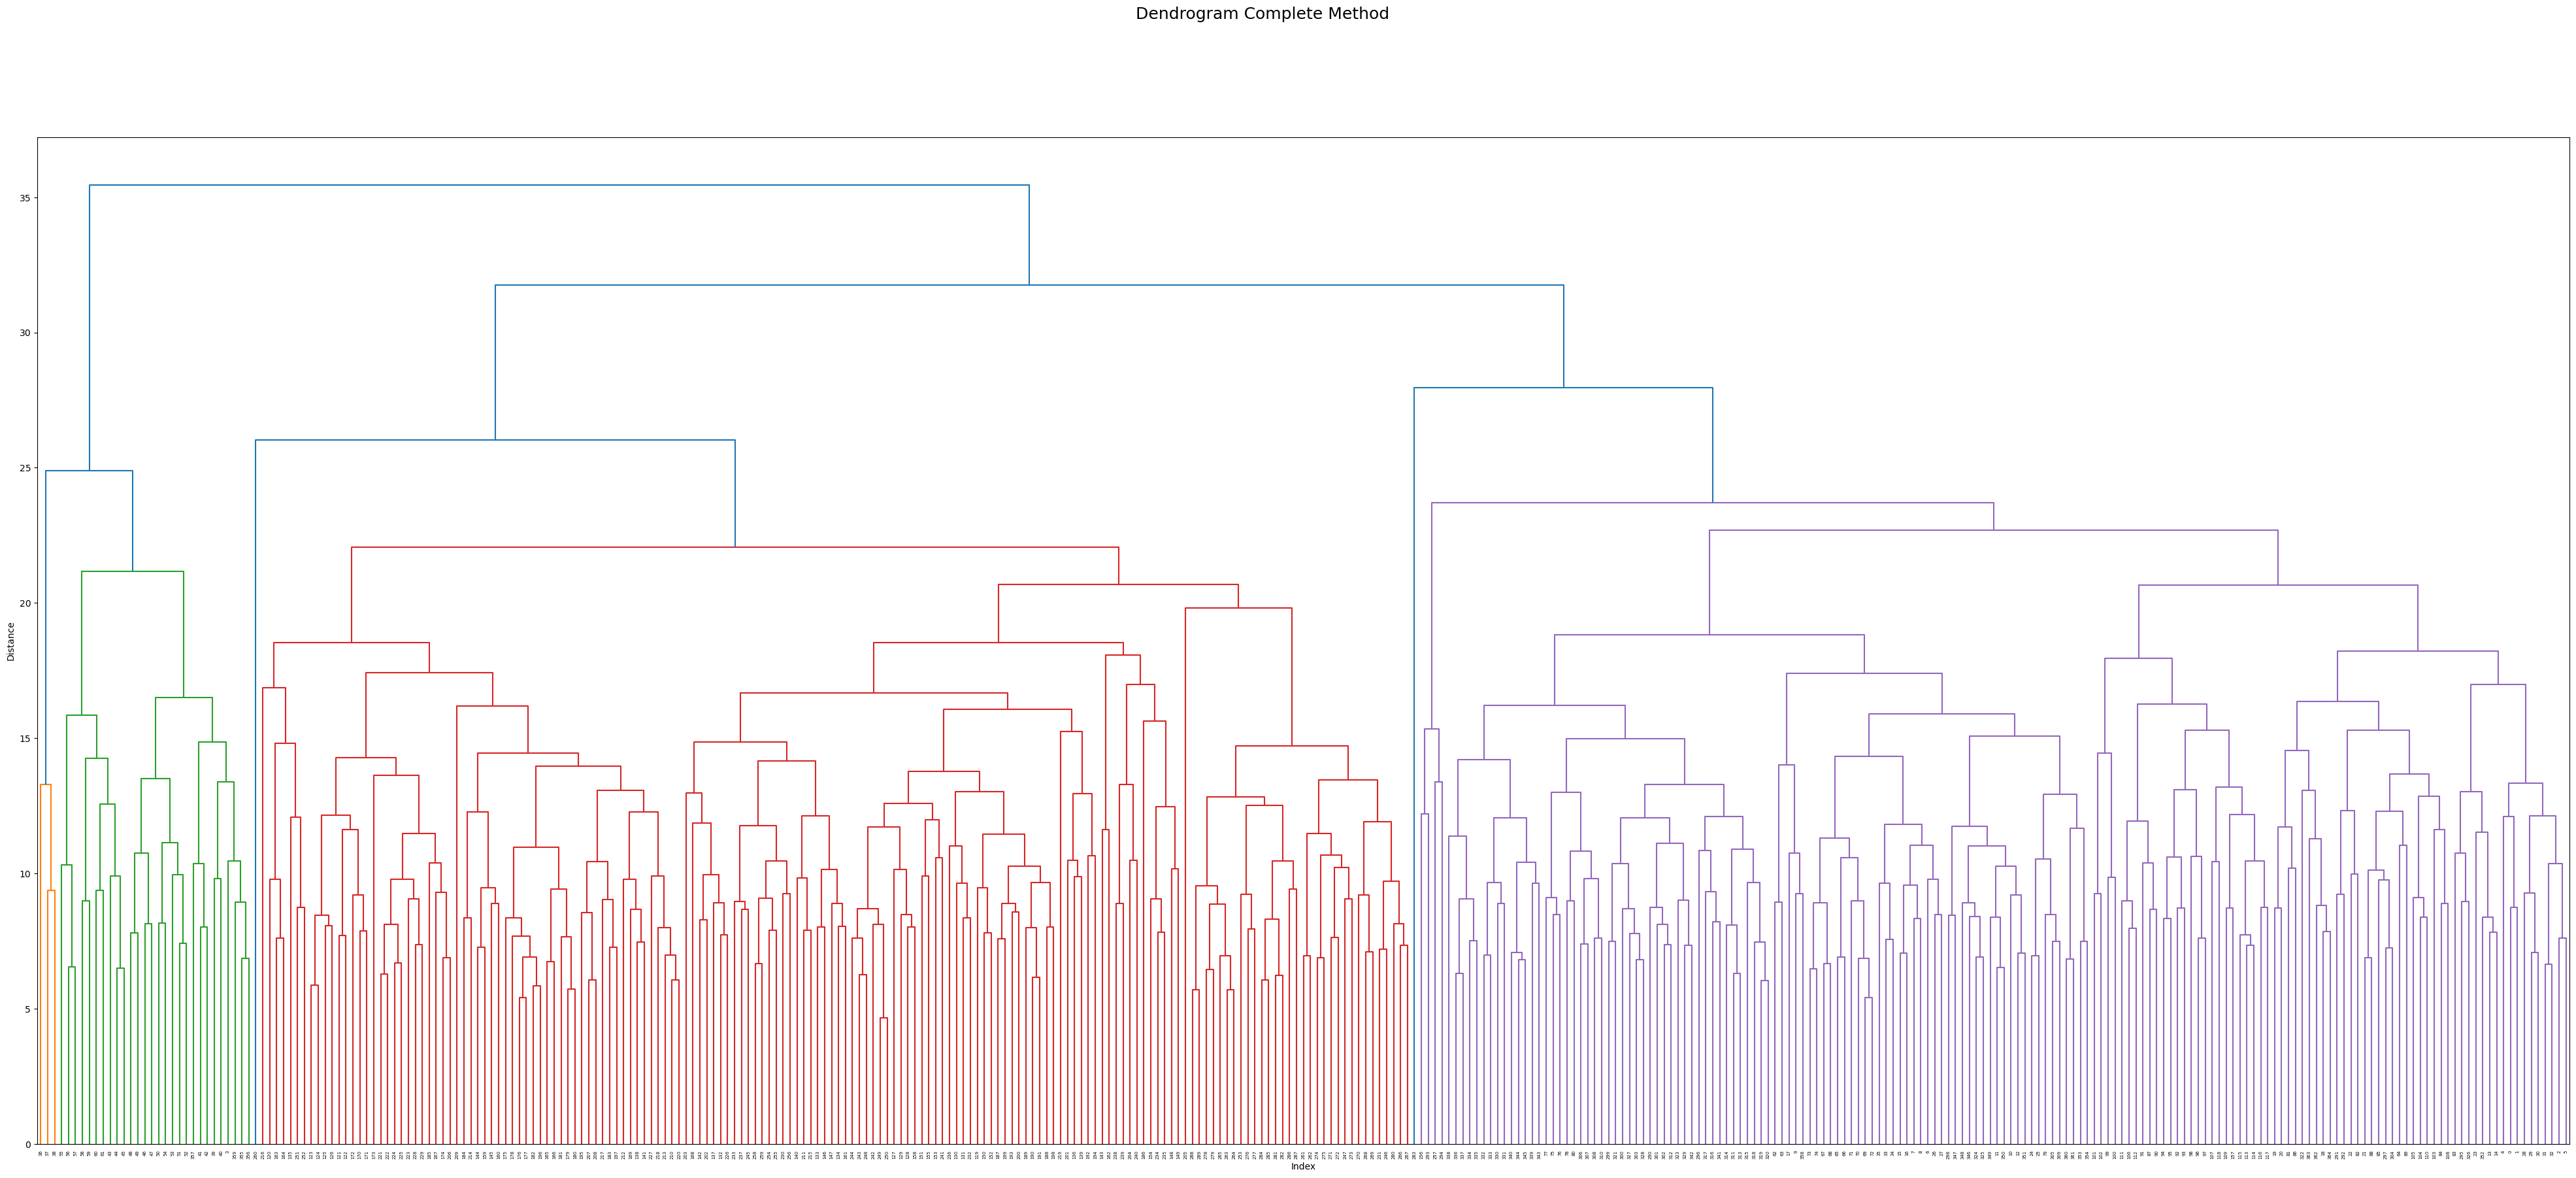

In [22]:
# Create the dendrogram using the complete linkage method
linked = linkage(data, method='complete')

# Plot the dendrogram
plt.figure(figsize=(50,20))
dendrogram(linked, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

- average method

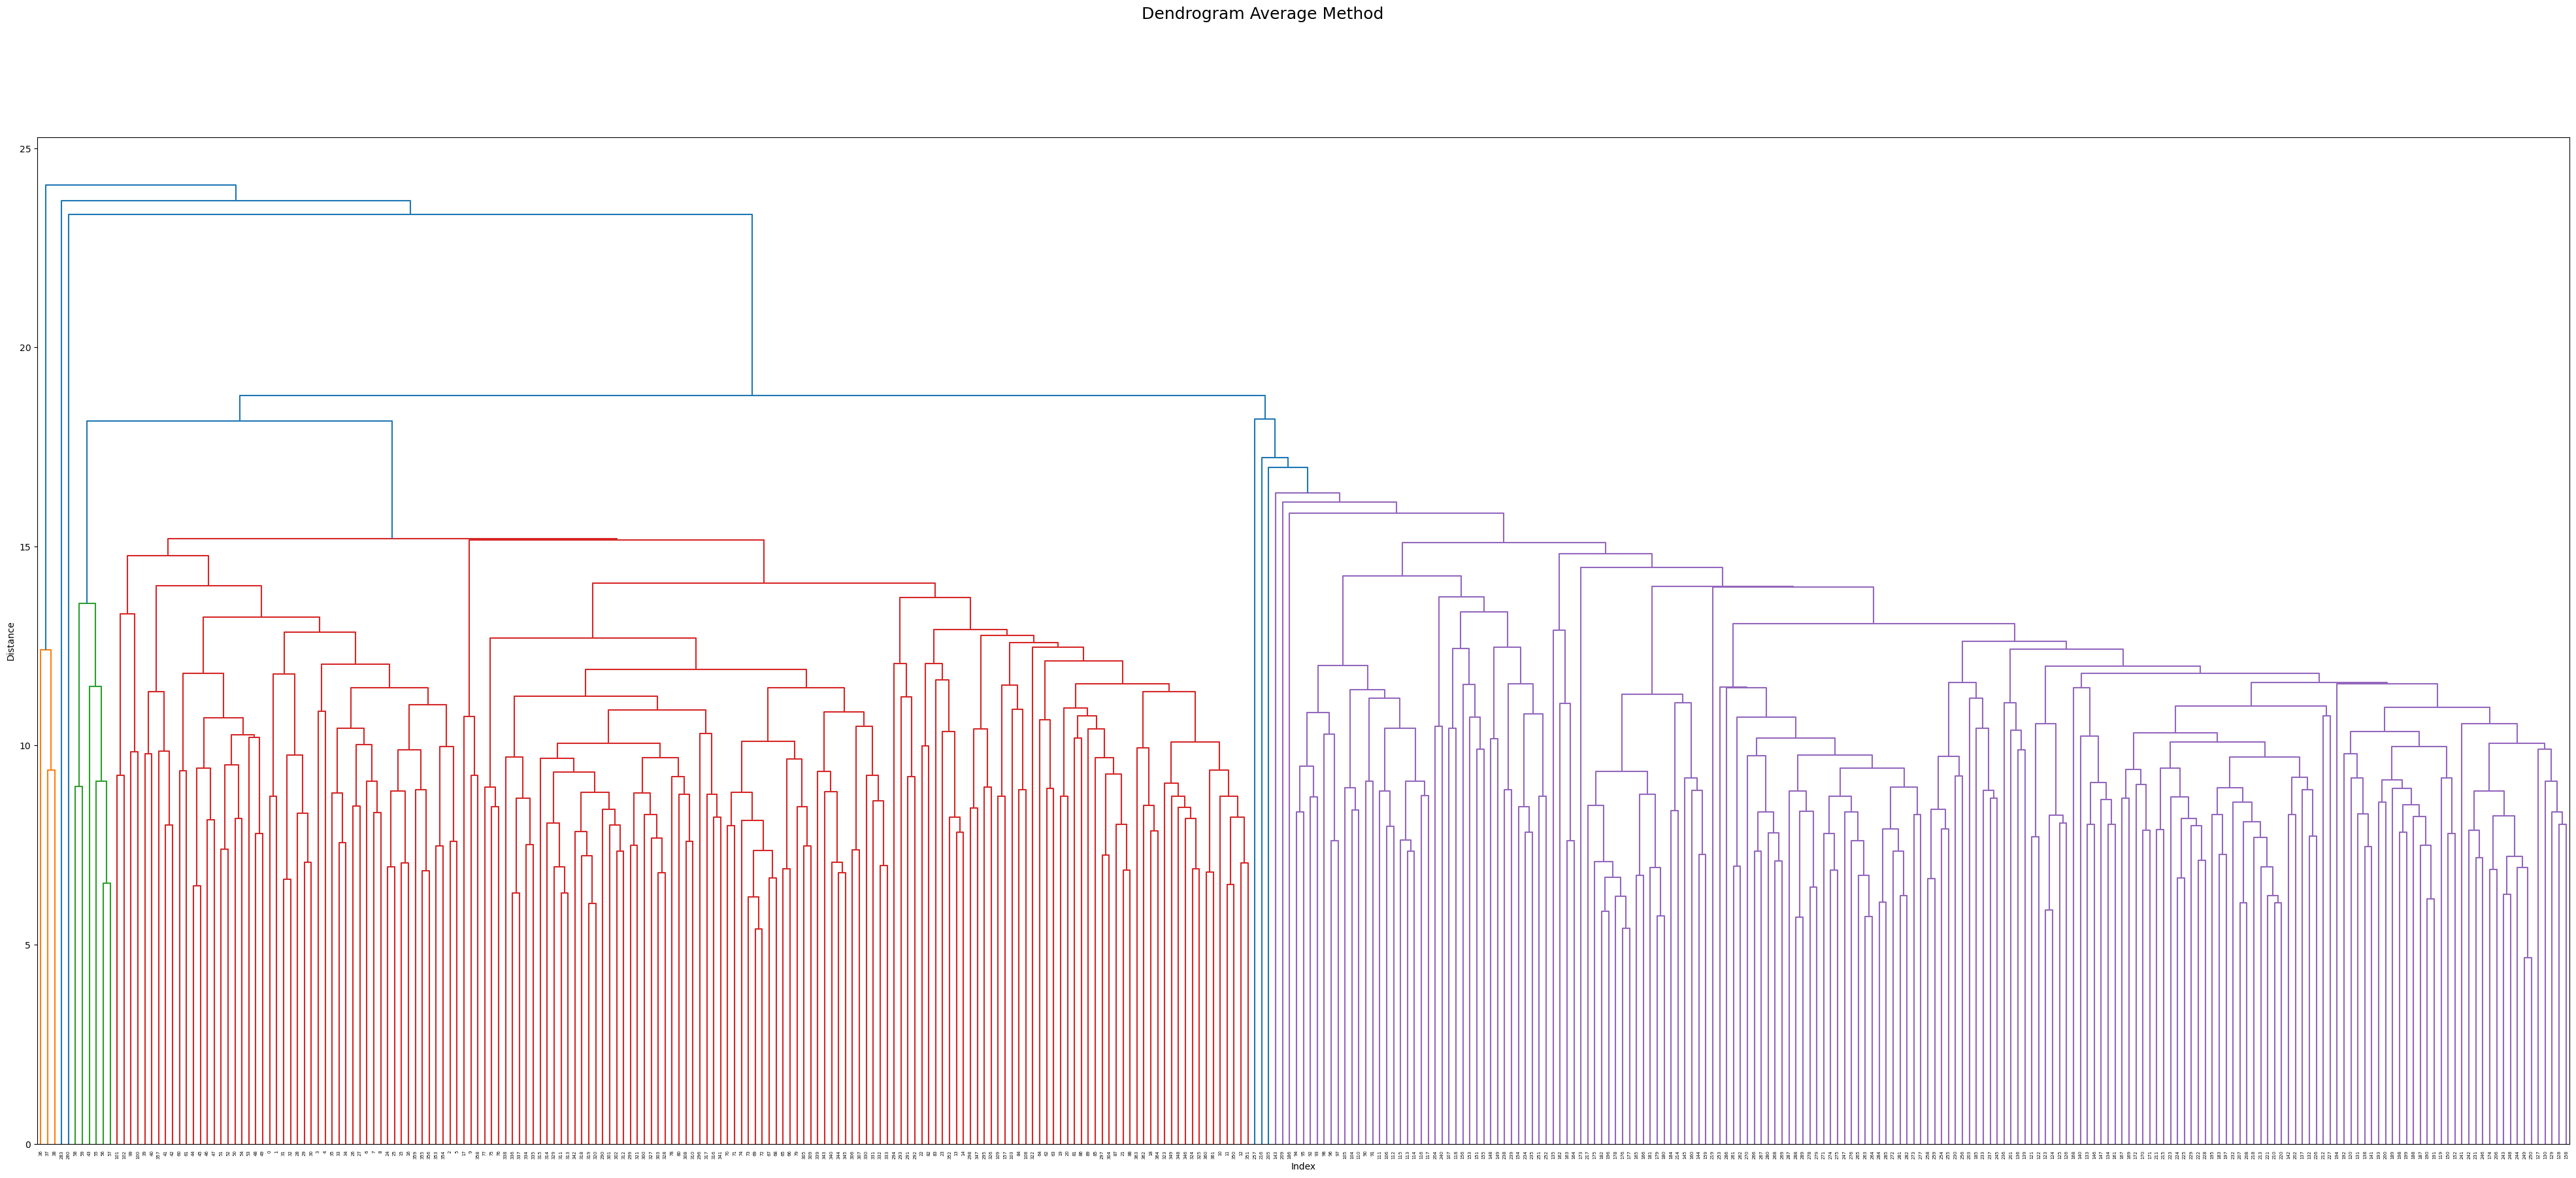

In [23]:
# Create the dendrogram using the average linkage method
linked = linkage(data, method='average')

# Plot the dendrogram
plt.figure(figsize=(50,20))
dendrogram(linked, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

- ward method

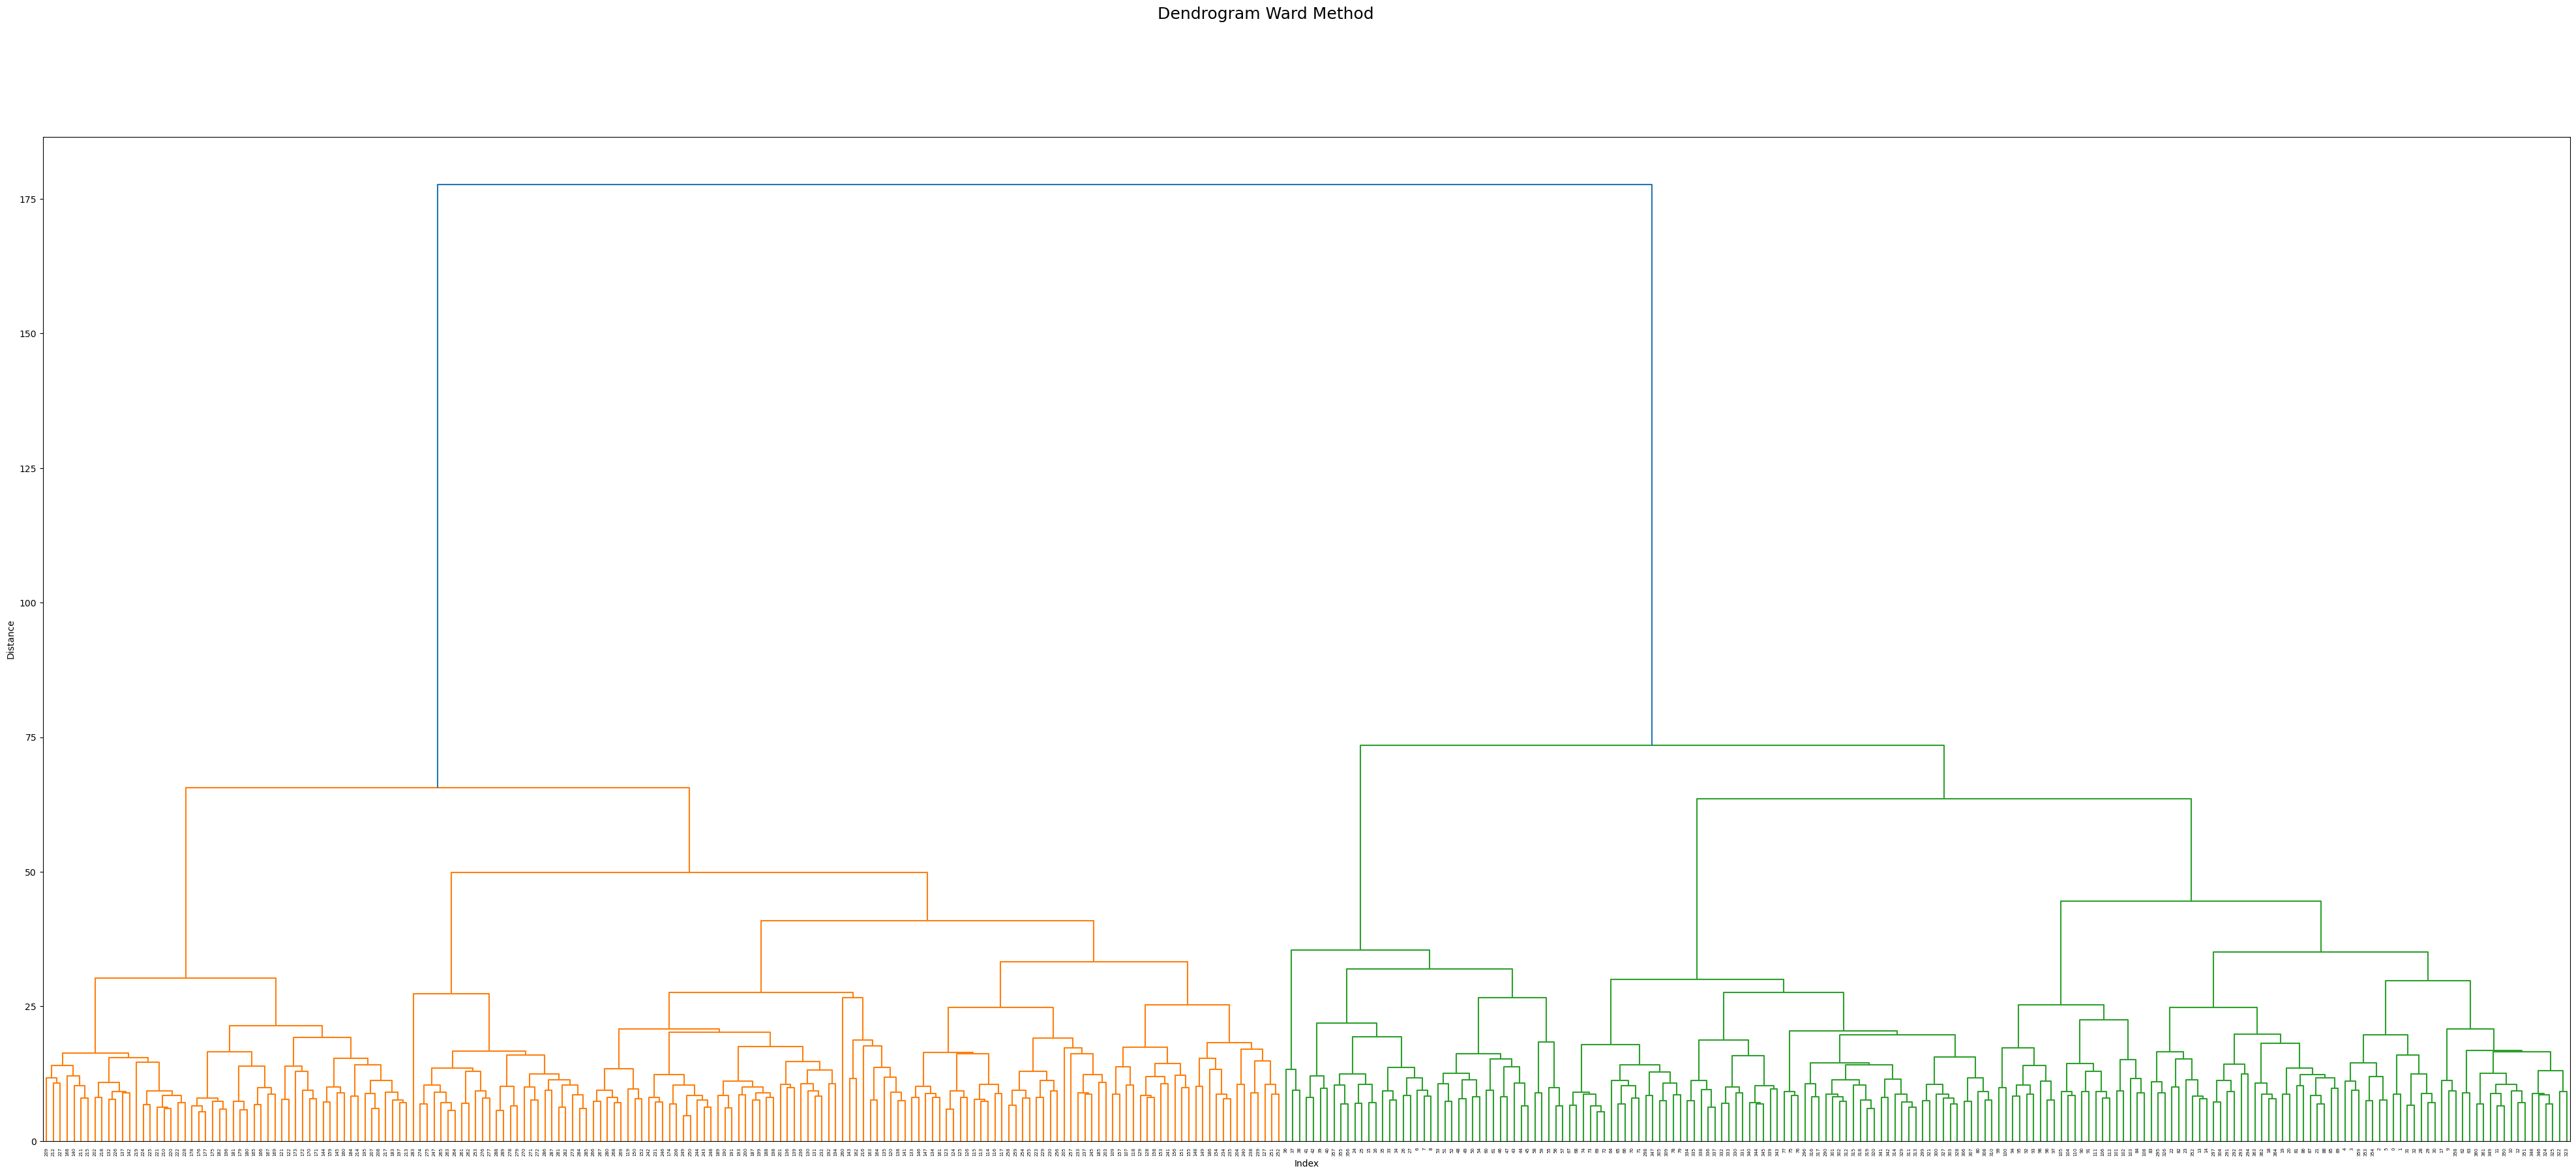

In [24]:
# Create the dendrogram using the ward linkage method
linked = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(50,20))
dendrogram(linked, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

## 5. Principal Component Analysis

In [25]:
data

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.640358,-4.440892e-16,-0.588192,-1.560353,-1.033488,-0.124370,-0.305050,-0.455403,-1.550172,-1.556827,...,0.598959,0.422892,-3.254596,-1.059097,1.245752,-0.084232,-0.602058,-1.192237,-1.521242,-0.737747
1,0.223726,-4.440892e-16,0.257045,-2.677416,-0.796560,-0.369860,-0.158738,-0.114684,-0.715565,-0.960188,...,-1.061447,0.678236,-3.041547,-0.914445,-0.439212,-0.084232,-0.107254,-1.431311,-1.325152,-1.375120
2,-0.192906,-4.440892e-16,-1.539084,-2.291763,-0.683737,0.162035,-0.305050,0.518079,-0.348844,-0.221492,...,-0.507978,-0.853829,-0.330026,-0.890336,1.820779,-0.084232,-0.456527,-1.006291,-1.300641,-1.273140
3,-0.192906,-4.440892e-16,0.574008,-0.164025,-0.706302,-0.492606,0.426509,0.566753,-1.221388,-1.528416,...,0.045491,-0.215469,-0.930434,-1.131423,0.483507,-0.084232,-0.893119,-0.979728,-1.300641,-0.533787
4,1.056989,-4.440892e-16,-0.693847,-1.547055,-0.988359,-0.492606,0.133885,-0.552751,-1.132869,-1.585239,...,0.045491,-0.470813,-1.036958,-1.047043,-0.198503,-0.084232,-0.514739,-1.670384,-1.521242,-1.630069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1.056989,-4.440892e-16,0.362699,0.527490,-1.191440,-0.472148,0.426509,-1.015154,-0.917894,-0.562429,...,0.598959,-0.853829,1.248467,-1.155532,-0.412466,-0.084232,-0.922225,-0.342199,-0.295680,-0.457302
361,1.056989,-4.440892e-16,-0.165574,1.046126,-1.281698,-0.492606,0.133885,-1.015154,-0.627046,-0.448783,...,1.152428,1.061253,0.783635,-0.986771,-0.559566,-0.084232,-0.602058,0.056257,0.194546,-0.074878
362,1.056989,-4.440892e-16,-0.693847,0.806755,-1.191440,-0.472148,-0.305050,-0.942143,-0.171806,0.233090,...,1.152428,1.316597,-0.213818,-1.155532,2.810361,-0.084232,-0.922225,0.401585,0.758304,-0.100373
363,0.640358,-4.440892e-16,-1.539084,0.168434,-1.010923,-0.492606,-0.305050,-0.844795,-0.083287,0.332530,...,0.045491,0.167548,-1.521158,-0.938554,-0.372348,-0.084232,-0.369209,-0.023434,0.390636,0.001607


In [26]:
# Run PCA to reduce to N components
N = 2
pca = PCA(n_components=N)
principalComponents = pca.fit_transform(data)

In [27]:
principalComponents

array([[-1.23588244e+01, -3.29395769e+00],
       [-1.07661530e+01, -7.22014090e+00],
       [-8.83032772e+00, -5.11783125e+00],
       [-1.03405511e+01, -7.15104986e-01],
       [-1.13356717e+01, -3.37079609e+00],
       [-1.01598333e+01, -3.47169257e+00],
       [-1.09021069e+01,  1.61615856e+00],
       [-1.06500020e+01,  2.53120299e-01],
       [-1.09381439e+01,  3.53246545e+00],
       [-1.12119239e+01,  7.02008296e-01],
       [-9.47470690e+00, -2.20350458e+00],
       [-8.76452956e+00, -1.79167434e+00],
       [-7.82765138e+00, -4.62372428e+00],
       [-6.67543349e+00, -6.65222582e+00],
       [-8.15888069e+00, -5.61911922e+00],
       [-8.99082338e+00, -2.55616344e-01],
       [-9.33786310e+00,  2.01969624e+00],
       [-9.92409673e+00, -3.25114690e+00],
       [-7.43175283e+00, -6.49178634e+00],
       [-6.17296313e+00, -2.61471081e-01],
       [-6.71984010e+00, -1.84008209e+00],
       [-7.07773405e+00, -4.21336707e+00],
       [-6.95185639e+00, -9.61205801e+00],
       [-8.

In [28]:
# Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=[f'PCA{i+1}' for i in range(N)])

In [29]:
dfPCA.head()

,PCA1,PCA2
0,-12.358824,-3.293958
1,-10.766153,-7.220141
2,-8.830328,-5.117831
3,-10.340551,-0.715105
4,-11.335672,-3.370796


In [30]:
dfPCA.shape

(365, 2)

In [31]:
dfPCA.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'dfPCA_1986.csv'))

In [32]:
pleasantweather_year = pleasantweather[pleasantweather['DATE'].astype(str).str.startswith('1986')]
pleasantweather_year 

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
9497,19860101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9498,19860102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9499,19860103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9500,19860104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9501,19860105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9857,19861227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9858,19861228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9859,19861229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9860,19861230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
#Add the pleasant weather to the dataframe to show the relationship
basel_pleasant = [pleasantweather_year['BASEL_pleasant_weather']]
basel_pleasant

[9497    0
 9498    0
 9499    0
 9500    0
 9501    0
        ..
 9857    0
 9858    0
 9859    0
 9860    0
 9861    0
 Name: BASEL_pleasant_weather, Length: 365, dtype: int64]

In [34]:
# Add the 'BASEL_pleasant_weather' column to dfPCA directly based on the index
dfPCA['BASEL_pleasant_weather'] = pleasantweather_year['BASEL_pleasant_weather'].values

In [35]:
dfPCA

,PCA1,PCA2,BASEL_pleasant_weather
0,-12.358824,-3.293958,0
1,-10.766153,-7.220141,0
2,-8.830328,-5.117831,0
3,-10.340551,-0.715105,0
4,-11.335672,-3.370796,0
...,...,...,...
360,-9.556846,-0.766766,0
361,-8.680355,-1.853674,0
362,-6.698710,-4.511310,0
363,-6.090560,-6.951449,0


/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([<matplotlib.axis.XTick at 0x1339965d0>,
 [Text(0, 0, '-14.369599569111271'),
  Text(8, 0, '-12.262068903945782'),
  Text(16, 0, '-11.211923939084844'),
  Text(27, 0, '-10.650001994314998'),
  Text(42, 0, '-10.009418168255959')])

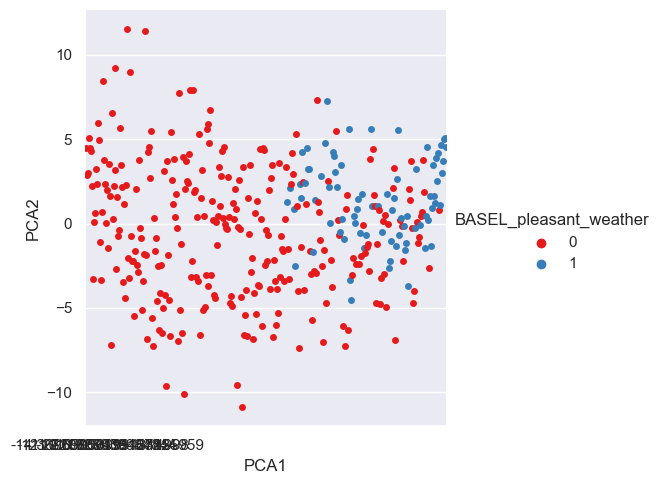

In [38]:
sns.set_theme()
g = sns.catplot(x="PCA1", y="PCA2", hue="BASEL_pleasant_weather", palette='Set1', data=dfPCA)
plt.xticks([0, 8, 16, 27, 42])

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


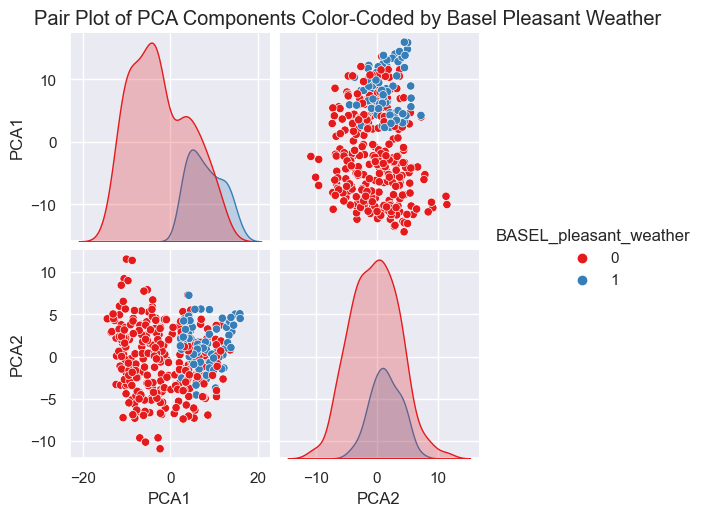

In [39]:
# Create pair plot for all principal components
sns.set_theme()
pair_plot = sns.pairplot(dfPCA, hue="BASEL_pleasant_weather", palette='Set1', 
                         vars=[f'PCA{i+1}' for i in range(N)])
pair_plot.fig.suptitle('Pair Plot of PCA Components Color-Coded by Basel Pleasant Weather', y=1.02)
plt.show()

In [50]:
data_WM=dfPCA.copy()

data_WM['clust']=fcluster(linked,2, criterion='maxclust')
data_WM.head()

,PCA1,PCA2,BASEL_pleasant_weather,clust
0,-12.358824,-3.293958,0,2
1,-10.766153,-7.220141,0,2
2,-8.830328,-5.117831,0,2
3,-10.340551,-0.715105,0,2
4,-11.335672,-3.370796,0,2


In [59]:
print(data_WM['clust'].value_counts())

clust
2    186
1    179
Name: count, dtype: int64


<Axes: title={'center': 'pleasant_weather'}, xlabel='PCA1', ylabel='PCA2'>

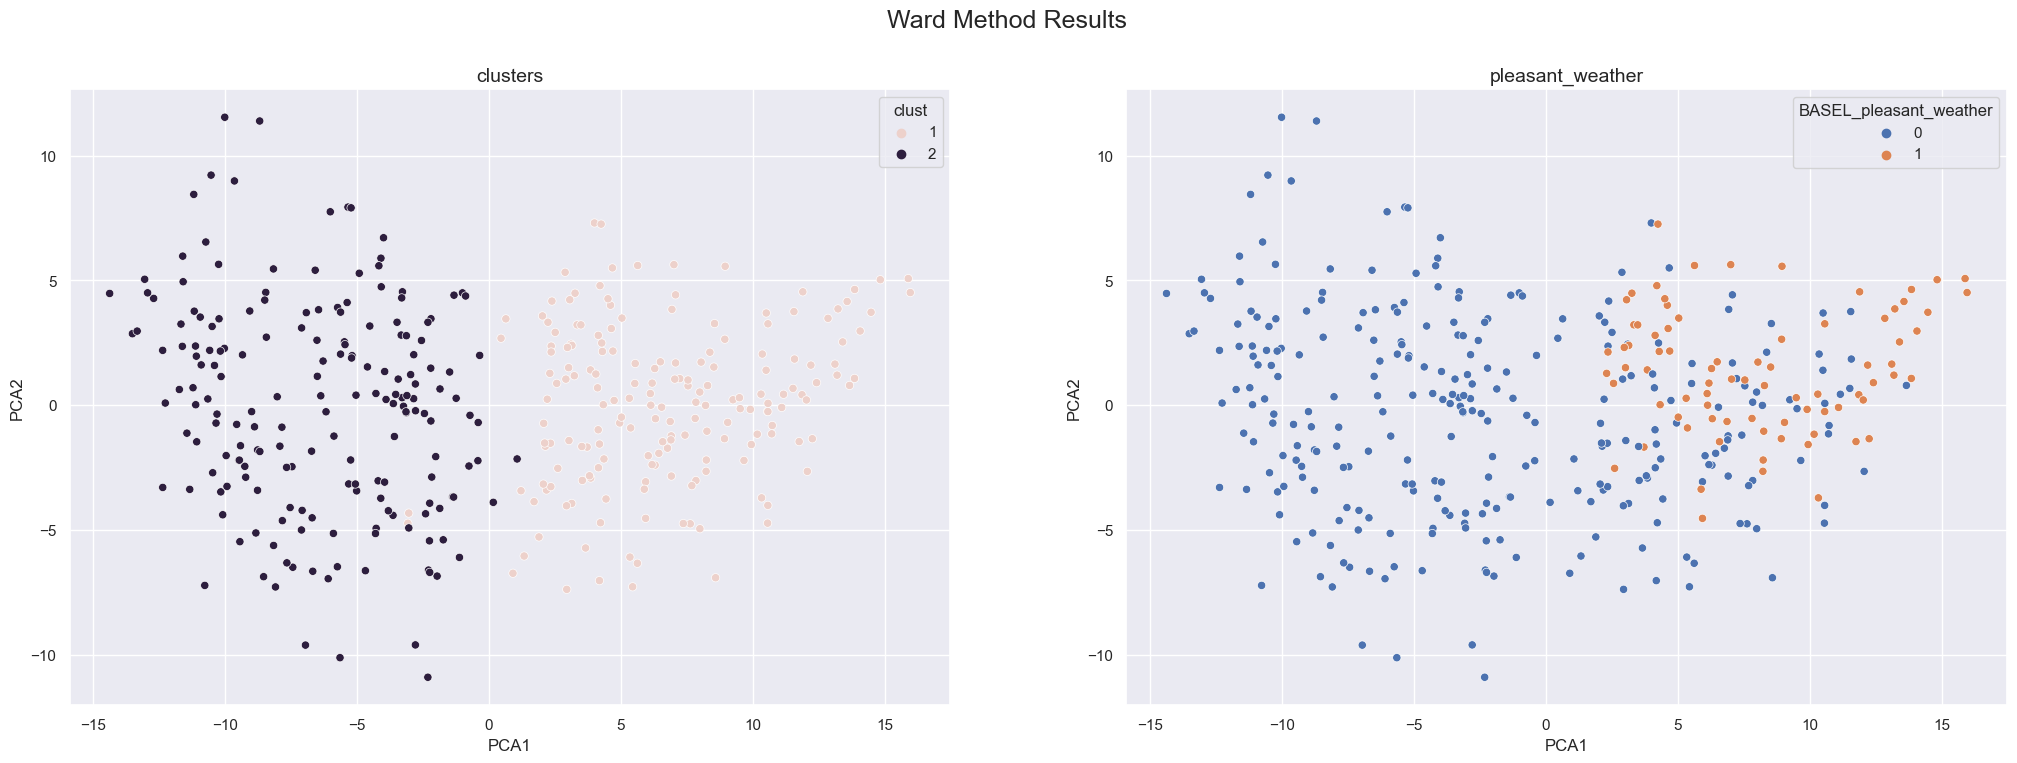

In [60]:
plt.figure(figsize=(25,8))

plt.suptitle("Ward Method Results",fontsize=18)

plt.subplot(1,2,1)
plt.title("clusters",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=data_WM, hue="clust")

plt.subplot(1,2,2)
plt.title("pleasant_weather",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=data_WM, hue="BASEL_pleasant_weather")